# Coordinate Descent in Lasso Regression

- Optimization algo for large-scale problems
- Works by minimizing 1 feature at a time
- Efficient for models with L1 regularization like Lasso Regression

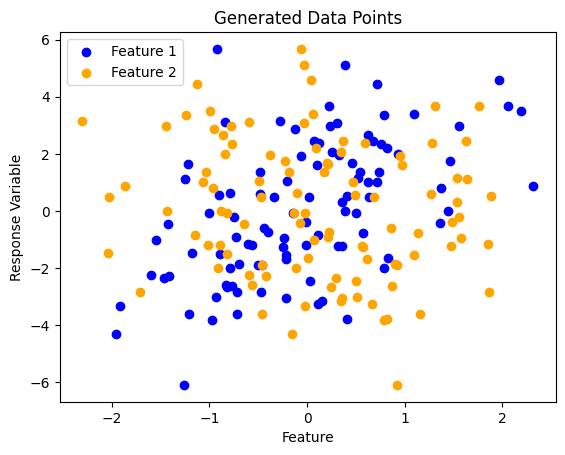

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#Generate synthetic data
np.random.seed(42)
X=np.random.randn(100,5)
true_beta=np.array([1.5,0,-2,0,0]) #True coefficients
y=X @ true_beta + np.random.randn(100) * 0.5 #Add noise

#Plotting the 1st 2 features against the response variable
plt.scatter(X[:,0],y,color='blue',label='Feature 1')
plt.scatter(X[:,1],y,color='orange',label='Feature 2')
plt.xlabel('Feature')
plt.ylabel('Response Variable')
plt.title('Generated Data Points')
plt.legend()
plt.show()

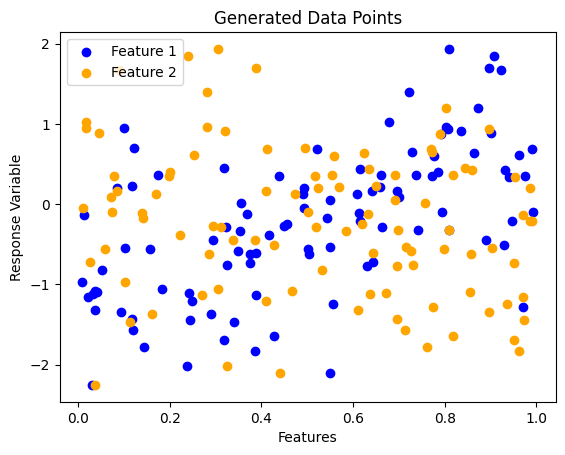

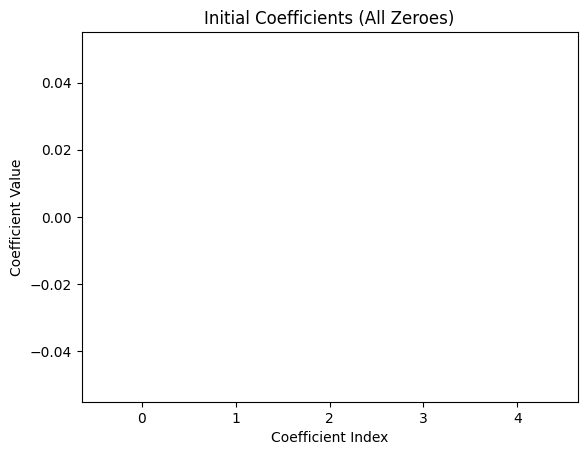

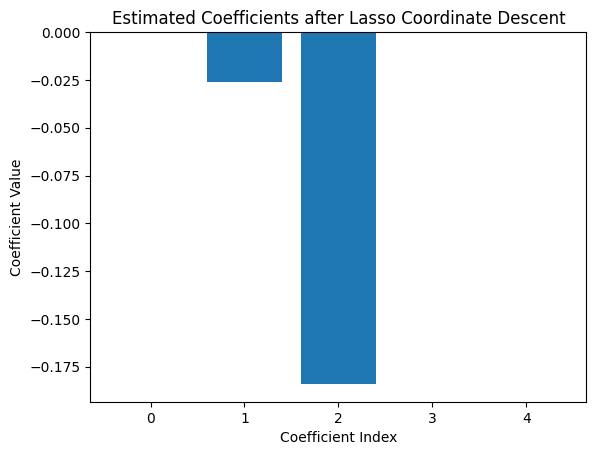

In [12]:
def soft_thresholding(a,t):
    if a>t :
        return a-t
    elif a<-t:
        return a+t
    else:
        return 0
    
def lasso_coordinate_descent(X,y,lambda_,num_iterations=1000):
    n,p=X.shape #no. of samples(n) and features(p)
    beta=np.zeros(p) #Initialize coefficients to zero

    #Standardize features 
    X_std = (X - np.mean(X, axis=0)) / np.std(X,axis=0)

    for iteration in range (num_iterations):
        for j in range (p):
            r_j=y-X @ beta + X[:,j] * beta[j]

            #Compute the coordinate gradient 
            gradient=np.dot(X[:,j],r_j)/n
            beta[j]=soft_thresholding(gradient,lambda_)

    return beta

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
true_beta=np.array([1.5,0,-2,0,0]) #True coefficients
y=X @ true_beta + np.random.randn(100) * 0.5 #Add noise

#Plotting the generated points
plt.scatter(X[:,0],y,color='blue',label='Feature 1')
plt.scatter(X[:,1],y,color='orange',label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Response Variable')
plt.title('Generated Data Points')
plt.legend()
plt.show()

# Initialize coefficients and plot initial values
beta_initial = np.zeros(X.shape[1])
plt.bar(range(len(beta_initial)),beta_initial)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Initial Coefficients (All Zeroes)')
plt.show()

# Set lambda and number of iterations for Lasso
lambda_ = 0.1
num_iterations = 1000

# Running Lasso Coordinate Descent
beta = lasso_coordinate_descent(X, y, lambda_, num_iterations)

# Plotting the resulting coefficients
plt.bar(range(len(beta)), beta)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Estimated Coefficients after Lasso Coordinate Descent')
plt.show()
